

# Project: Investigate a Dataset (The TMDB movie dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset chosen for this project is the TMDB movie dataset, this dataset contains information about 10,000 movies collected from The Movie Database (TMDb), this dataset include information such as user rating and revenue.

Refrence : https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf



In [54]:
# Set up import statements for all of the packages that we plan to use.
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid",palette='hsv', font_scale=2)

#   include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Find the number of rows and columns
df.shape

(10866, 21)

In [4]:
# Print full summary of the datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Assessing The Data Set

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Find the number of duplicated rows
sum(df.duplicated())

1

# Handeling Missing Data

We notice that imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies all have missing values.And there is one line of duplicates.

In [7]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [8]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [10]:
#drop unwanted columns 
unwanted_col=['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']
df.drop(unwanted_col, axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [12]:
#drop null values
df.dropna(inplace = True)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

Here we look into the rows that have zeros in their budget, revenue and runtime columns and clean them up.

In [13]:
# Refrences
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
target_col = ['budget','revenue','runtime']
# replace any cell which holds a zero under the targeted columns 'budget, revenue and runtime' with NaN
df[target_col] = df[target_col].replace(0, np.NaN)
#drop any null
df.dropna(subset = target_col, inplace = True)
# the new number of the data
df.shape

(3853, 14)

Next we look into the data types of the dataset and adjust accordingly

In [14]:
#Refrences
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
df.dtypes

id                  int64
popularity        float64
budget            float64
revenue           float64
original_title     object
director           object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [15]:
#Refrences
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#Change the 'release_date' into a date format
df.release_date = pd.to_datetime(df['release_date'])
#check that data
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Apology**: I would like to aplogize to the previous reviewer and the entirty of udacity team, I was excersicing the logic behind my friends solution, I had completley forgotten I left it there, I had no intention in taking credit for someone elses solution, I paid money for this nd and i plan on pursuing a career in data science with the help of udacity, i am so sorry.

> Please note that i have listed the refrences as much as i could.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which movie has the longest runtime and which move has the shortest runtime ?

In [39]:
#Refrences
#https://www.geeksforgeeks.org/python-pandas-dataframe-idxmin/
#https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/
#max_index = df['runtime'].idxmax()
#df.loc[max_index]

In [35]:
# We define functions that calculates and returns the max and min of a dataframe
def find_min(attribute):
    min_index = df[attribute].idxmin()
    return df.loc[min_index]

In [36]:
def find_max(attribute):
    max_index = df[attribute].idxmax()
    return df.loc[max_index]

In [37]:
#min_index = df['runtime'].idxmin()
#df.loc[min_index]
find_min('runtime')

id                              24914
popularity                   0.208637
profit                             -5
budget                             10
revenue                             5
original_title            Kid's Story
director          Shinichiro Watanabe
runtime                            15
genres                Science Fiction
release_date      2003-06-02 00:00:00
vote_count                         16
vote_average                      6.8
release_year                     2003
budget_adj                    11.8535
revenue_adj                   5.92676
Name: 5162, dtype: object

In [38]:
find_max('runtime')

id                              43434
popularity                   0.534192
profit                   -1.71287e+07
budget                        1.8e+07
revenue                        871279
original_title                 Carlos
director              Olivier Assayas
runtime                           338
genres                          Crime
release_date      2010-05-19 00:00:00
vote_count                         35
vote_average                      6.2
release_year                     2010
budget_adj                    1.8e+07
revenue_adj                    871279
Name: 2107, dtype: object

#### The movie with the longest runtime : Carlos, 338 minutes long

#### The movie with the shortest runtime : Kid's Story, 15 minutes long

### Research Question 2  : What is the average budget ?

In [18]:
df['budget'].mean()

37212267.85984947

#### Next we use visualizations and create a chart to demonstrate the avg budget spent in movie production

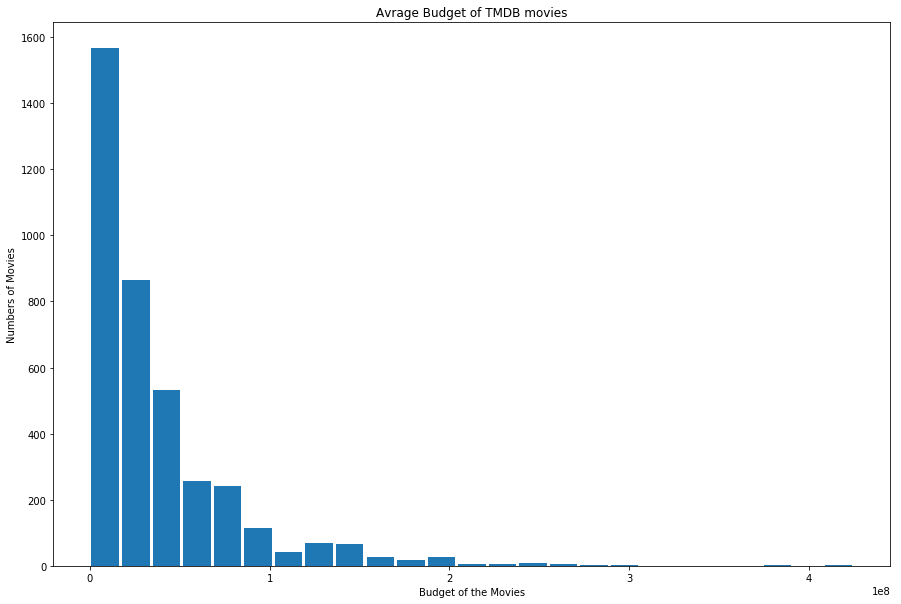

In [19]:
#Refrences
#https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c
plt.figure(figsize=(15,10))
#set the title for the graph
plt.title('Avrage Budget of TMDB movies')
#set the title for the x axis
plt.xlabel('Budget of the Movies')
#set the title for the y axis
plt.ylabel('Numbers of Movies')
#specify graph type using hist() and specify which column
plt.hist(df['budget'], rwidth = 0.9, bins =25)
#show/plot the graph
plt.show()
#df['budget'].hist()

### Research Question 3  : Which geners have the highest profits ?

First we begin by splitting the data in the generes column

In [20]:
df['genres']=df['genres'].str.split('|', 1,expand=True)

In [21]:
#count number of movies for each genre:
count = df['genres'].value_counts()
count

Drama              889
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

Text(0, 0.5, 'Number Of Movies')

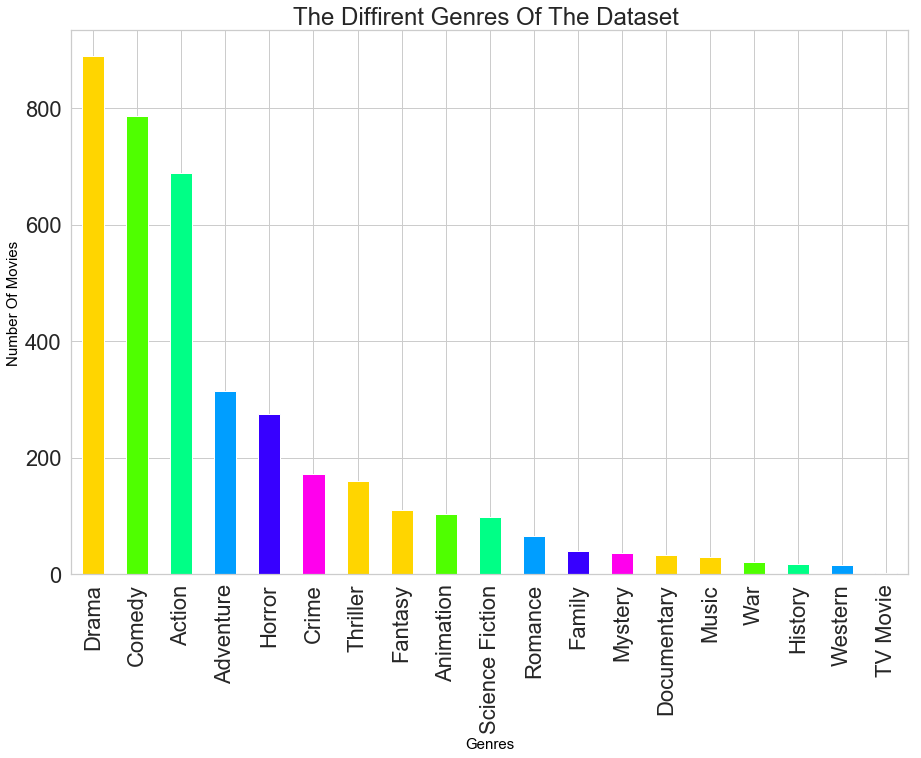

In [74]:
#plot each genre movies as bar plot:
gplt = df['genres'].value_counts().plot(kind = 'bar', figsize=(15,10))
gplt.set(title = 'The Diffirent Genres Of The Dataset ')
#set title of x axis
gplt.set_xlabel('Genres', color = 'black', fontsize = '15')
#set title of y axis
gplt.set_ylabel('Number Of Movies', color = 'black', fontsize = '15')

#### Now we proceed to calculating the profit, profit = revenue - budget

In [23]:
# Profit = revenue - budget
#Refrence 
#https://www.geeksforgeeks.org/python-pandas-dataframe-insert/
df.insert(2, 'profit', df['revenue'] - df['budget'])

In [24]:
df.head()

,id,popularity,profit,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,1.868178e+09,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1.316249e+09,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Now that we have the profit inserted as a column and in order to decide which which generas made the highest profit we must find the movie with the highest profit and use the profit it made as a benchmark for deciding succesful geners.

In [40]:
#Refrences
#https://www.geeksforgeeks.org/python-pandas-dataframe-idxmin/
#https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/
# Finding the highest profit
find_max('profit')

id                              19995
popularity                    9.43277
profit                    2.54451e+09
budget                       2.37e+08
revenue                   2.78151e+09
original_title                 Avatar
director                James Cameron
runtime                           162
genres                         Action
release_date      2009-12-10 00:00:00
vote_count                       8458
vote_average                      7.1
release_year                     2009
budget_adj                2.40887e+08
revenue_adj               2.82712e+09
Name: 1386, dtype: object

In [41]:
find_min('profit')

id                              46528
popularity                    0.25054
profit                   -4.13912e+08
budget                       4.25e+08
revenue                   1.10876e+07
original_title      The Warrior's Way
director                   Sngmoo Lee
runtime                           100
genres                      Adventure
release_date      2010-12-02 00:00:00
vote_count                         74
vote_average                      6.4
release_year                     2010
budget_adj                   4.25e+08
revenue_adj               1.10876e+07
Name: 2244, dtype: object

As we can see the movie with the biggest profit is Avatar with a profit of two billion. 

Meanwhile The Warrior's Way made a lose of profit that's equal to four hundred thirteen million. 

Next we find the avg profit.

In [27]:
df['profit'].mean()

70499442.09135738

Now that we know that movies avreage profit is seventy million, I've decided to use the movies with more than 70 milion in profit to compare, this will be the bar to decide which generas have the highest profit.

In [28]:
#Refrences
#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
profit_df = df[df['profit'] >= 70000000]
profit_df.head()

,id,popularity,profit,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,1.868178e+09,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1.316249e+09,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


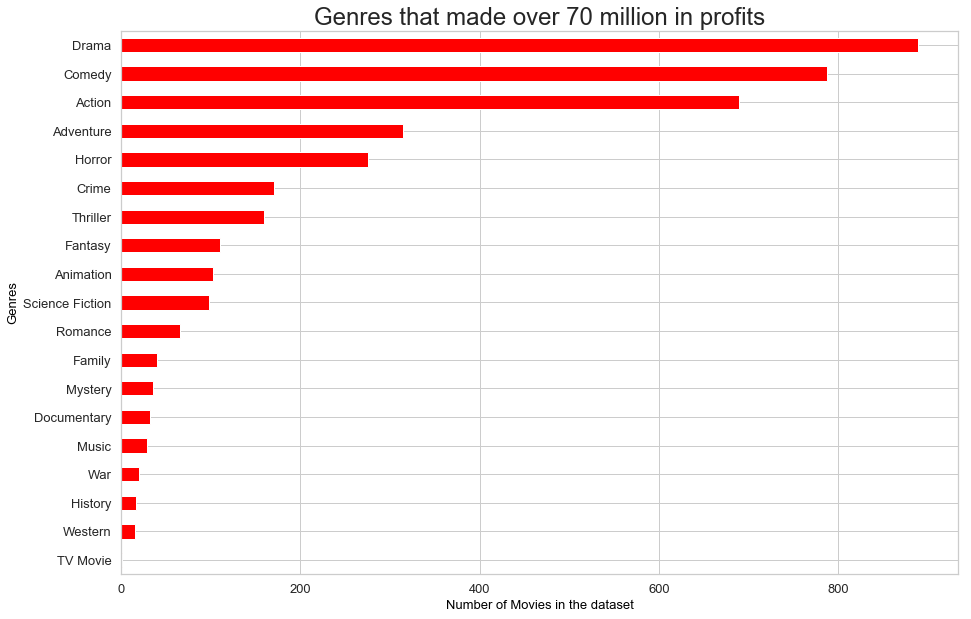

In [66]:
#Refrences
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barh.html

# sort the generes in ascending order, place the generes with the biggest number of movies first.
count.sort_values(ascending = True, inplace = True)
#plot a bar chart in horizantal view
chart = count.plot.barh(color = 'r', fontsize = 13, grid =True)
#set the chart title
chart.set(title = 'Genres that made over 70 million in profits')
#set title of x axis
chart.set_xlabel('Number of Movies in the dataset', color = 'black', fontsize = '13')
#set title of y axis
chart.set_ylabel('Genres', color = 'black', fontsize = '13')
#set the figure size(width, height)
chart.figure.set_size_inches(15, 10)
#ploting/showing the graph
plt.show()

#### We notice that the movies that make over 70 million in profit are all of the drama genere, this indicates that the genere with the highest profit is Drama.

# In the following code we use visualizations to describe and show correlation between variables.

Text(0.5, 1.0, 'Popularity Vs Release Year')

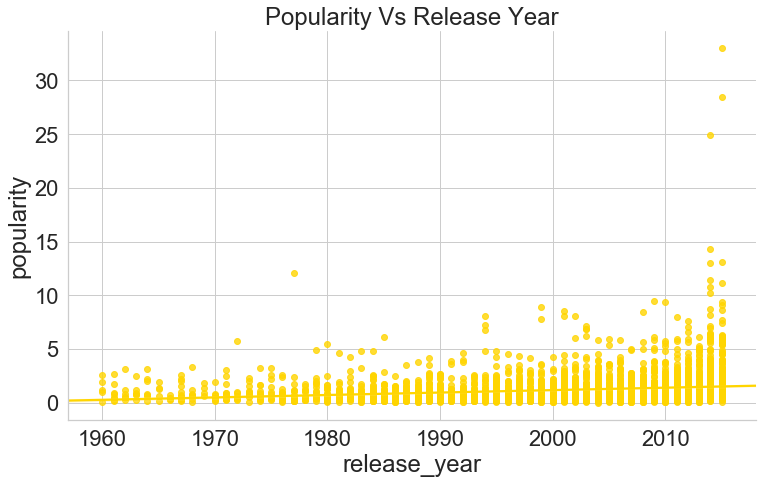

In [55]:
# We draw a scatter plot to explore the relationship between popularity and release year

# Refrence : https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-4-9b0119887130
#https://stackoverflow.com/questions/35948995/seaborn-lmplot-got-an-unexpected-keyword-argument-figsize
#https://stackoverflow.com/questions/46307941/how-can-i-add-title-on-seaborn-lmplot
# https://codeyarns.com/2015/04/20/how-to-change-font-size-in-seaborn/

sns.lmplot(x='release_year',y='popularity',data=df, height=7, aspect=1.6)
ax = plt.gca()
ax.set_title("Popularity Vs Release Year")

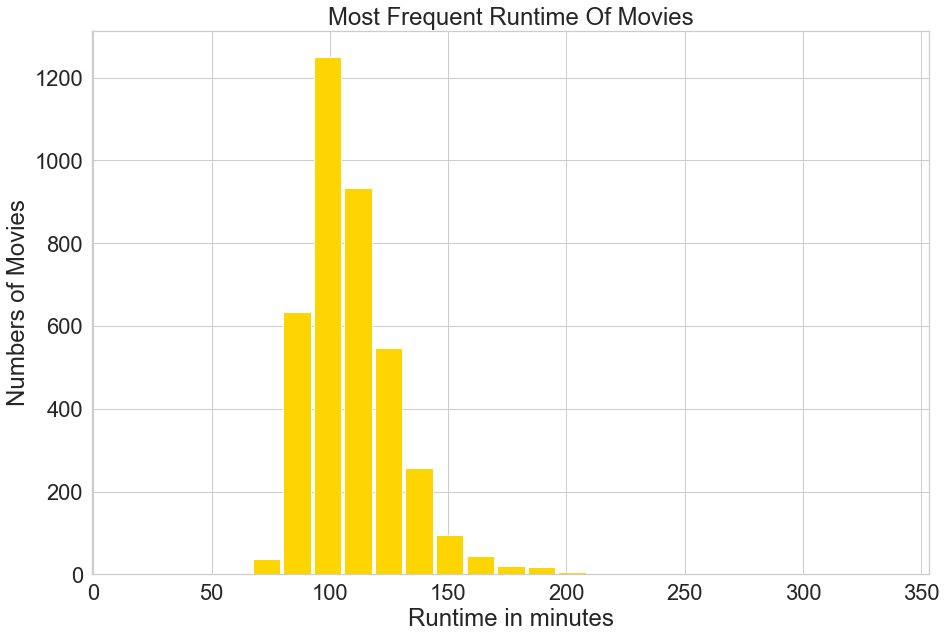

In [65]:
# WE draw a histogram to explore the most frequent runtime of movies.
#Refrences
#https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c
plt.figure(figsize=(15,10))
#set the title for the graph
plt.title('Most Frequent Runtime Of Movies')
#set the title for the x axis
plt.xlabel('Runtime in minutes')
#set the title for the y axis
plt.ylabel('Numbers of Movies')
#specify graph type using hist() and specify which column
plt.hist(df['runtime'], rwidth = 0.9, bins =25)
#show/plot the graph

plt.show()

<a id='conclusions'></a>
## Conclusions

This project answered the following questions:

1. Which movie has the longest runtime and which move has the shortest runtime ?

    The movie with the longest runtime : Carlos, 338 minutes long

    The movie with the shortest runtime : Kid's Story, 15 minutes long
    

2. What is the average budget ?
37212267


3. Which geners have the highest profits ?

    the movies that make over 70 million in profit are all of the drama genere, this indicates that the genere with the highest profit is Drama.



## Limitations
This dataset contained movies that had zero values in their budget, revenue and runtime columns. After replacing those cells with NaN then dropping them plus performing other operations, the dataset dimensions dropped from (10866, 21) to (3853, 14). This was a big decrease in the size that might affect our overall analysis. 